In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/'
import sys 
sys.path.append(path)

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Constantes y parametos EOS para enanas blancas

G = 6.67e-8
Msun  = 1.99e33
Gamma = 4.0/3.0 #Indice adiabatico
K = 1.244e15*(0.5**Gamma) # Constante politrópica

Método de Euler

Surface radius:  1538.0  unidades??
Total mass:  1.4574042551101913  Solar Masses

 



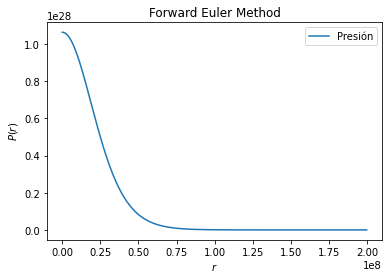

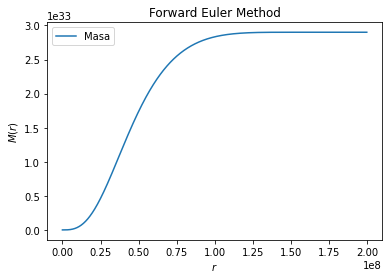

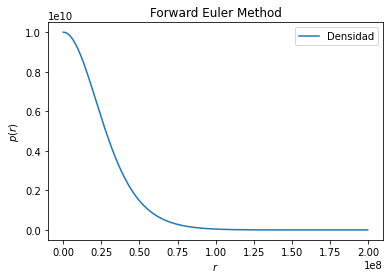

In [19]:
# Definir ecuaciones diferenciales
def ODE(radius, p, m): 

    # invert EOS to get density (needed in rhs)
    rho = (p/K)**(1/Gamma)

    rhs = np.zeros(2)
    if(radius > 1.0e-10): # Para remover la singularidad en r=0
        rhs[0] = -G*m*rho/(radius**2) #Equilibrio hidrostatico
        rhs[1] = 4*np.pi*rho*radius**2 #Conservación de la masa
    else:
        rhs[0] = 0.0
        rhs[1] = 0.0

    return rhs

def FEuler(radius, dr, p, m):
    ''' Forward-Euler Integrator '''
    new = np.zeros(2)
    old = np.zeros(2)
    old[0] = p
    old[1] = m

    # forward Euler integrator
    # for this, must call RHS routine
    new = old + dr*ODE(radius, old[0],old[1])
    # Inserción de método predictor-corrector
    new = old + dr/2*(ODE(radius, old[0],old[1]) + ODE(radius, new[0],new[1])) 
    
    return new[0], new[1]

# Establece el grid
npoints = 1000
radmax = 2.0e8 # 2000 km
radius = np.arange(start=0, stop=radmax, step=radmax/npoints)
dr = radius[1]-radius[0]

# Establece las variables
press = np.zeros(npoints)
rho   = np.zeros(npoints)
mass  = np.zeros(npoints)

# Establece los valores mínimos
rho[0]   = 1.0e10 #g/cm^3
press[0] = K * rho[0]**Gamma
mass[0]  = 0.0

# Establece el critero para terminar (surface pressure)
press_min = 1.0e-10 * press[0] 

nsurf = 0
for n in range(npoints-1):
    
    press[n+1],mass[n+1] = FEuler(radius[n], dr, press[n], mass[n])
    rho[n+1] = (press[n+1]/K)**(1/Gamma)

    # check for termination criterion
    if(press[n+1] < press_min and nsurf==0):
        nsurf = n

    # Despues de alcanzar el criterio de finalizacion se termina el proceso
    # y las funciones dejan de cambiar:
    if (nsurf > 0 and n+1 > nsurf):
        press[n+1] = press[nsurf]
        rho[n+1]   = rho[nsurf]
        mass[n+1]  = mass[nsurf]


print('Surface radius: ', radius[nsurf]/1.0e5, ' unidades??')
print('Total mass: ', mass[nsurf]/Msun, ' Solar Masses')
print('\n \n')

# Plot presión
fig, ax = plt.subplots()
ax.plot(radius, press, label="Presión")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$P(r)$')
plt.legend()
plt.show()

# Plot masa
fig, ax = plt.subplots()
ax.plot(radius, mass, label="Masa")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$M(r)$')
plt.legend()
plt.show()

# Plot densidad
fig, ax = plt.subplots()
ax.plot(radius, rho, label="Densidad")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$p(r)$')
plt.legend()
plt.show()

Método Runge-Kutta K4

Surface radius:  1536.0  unidades??
Total mass:  1.4574233987195315  Solar Masses

 



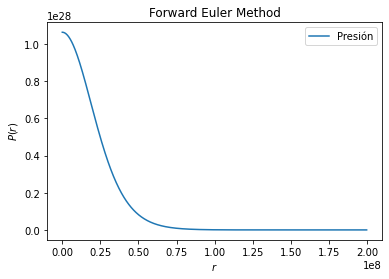

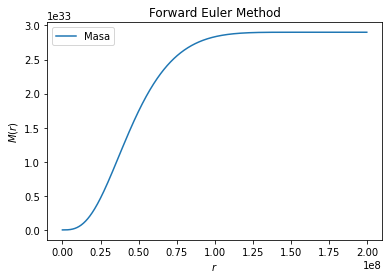

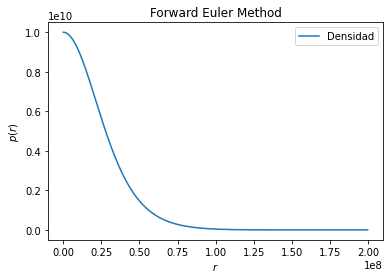

In [46]:
#Definir ecuaciones diferenciales

def ODE(radius, p, m): 

    # invert EOS to get density (needed in rhs)
    rho = (p/K)**(1/Gamma)

    rhs = np.zeros(2)
    if(radius > 1.0e-10): # Para remover la singularidad en r=0
        rhs[0] = -G*m*rho/(radius**2) #Equilibrio hidrostatico
        rhs[1] = 4*np.pi*rho*radius**2 #Conservación de la masa
    else:
        rhs[0] = 0.0
        rhs[1] = 0.0

    return rhs

def RK4(ODE, dr, r, p, m):
    '''
    ------------------------------------------
    RK4(ODE, dr, r, p, m):
    ------------------------------------------
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    Arguments:
    ODE: function defining the system of ODEs
    ------------------------------------------
    '''
    new = np.zeros(2)
    old = np.zeros(2)
    old[0] = p
    old[1] = m

    k1 = dr*ODE(r, old[0], old[1])
    k2 = dr*ODE(r + dr/2, old[0] + k1[0]/2, old[1] + k1[1]/2)
    k3 = dr*ODE(r + dr/2, old[0] + k2[0]/2, old[1] + k2[1]/2)
    k4 = dr*ODE(r + dr, old[0] + k3[0], old[1] + k3[1])
    new = old + (k1 + 2*k2 + 2*k3 + k4)/6

    return new[0], new[1]

# Establece el grid
npoints = 1000
radmax = 2.0e8 # 2000 km
radius = np.arange(start=0, stop=radmax, step=radmax/npoints)
dr = radius[1]-radius[0]

# Establece las variables
press = np.zeros(npoints)
rho   = np.zeros(npoints)
mass  = np.zeros(npoints)

# Establece los valores mínimos
rho[0]   = 1.0e10 #g/cm^3
press[0] = K * rho[0]**Gamma
mass[0]  = 0.0

# Establece el critero para terminar (surface pressure)
press_min = 1.0e-10 * press[0] 



nsurf = 0
for n in range(npoints-1):
    
    press[n+1], mass[n+1] = RK4(ODE, dr, radius[n], press[n], mass[n])
    
    # invert the EOS to get density
    rho[n+1] = (press[n+1]/K)**(1/Gamma)

    # check for termination criterion
    if(press[n+1] < press_min and nsurf==0):
        nsurf = n
    
    if(n+1 > nsurf and nsurf > 0):
        press[n+1] = press[nsurf]
        rho[n+1]   = rho[nsurf]
        mass[n+1]  = mass[nsurf]

print('Surface radius: ', radius[nsurf]/1.0e5, ' unidades??')
print('Total mass: ', mass[nsurf]/Msun, ' Solar Masses')
print('\n \n')

# Plot presión
fig, ax = plt.subplots()
ax.plot(radius, press, label="Presión")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$P(r)$')
plt.legend()
plt.show()

# Plot masa
fig, ax = plt.subplots()
ax.plot(radius, mass, label="Masa")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$M(r)$')
plt.legend()
plt.show()

# Plot densidad
fig, ax = plt.subplots()
ax.plot(radius, rho, label="Densidad")
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$p(r)$')
plt.legend()
plt.show() 


